In [12]:
# Find various aspects of pay among different majors


#import all the needed data
import os
import pandas as pd, matplotlib as mp,numpy as np
import matplotlib.pyplot as plt
associateDegreesDF = pd.read_csv('Resources/degrees-that-pay-back.csv', encoding ='cp1252')
earlyMidPayDF= pd.read_csv('Resources/early_mid_pay.csv', encoding ='cp1252')


In [13]:
#check data from each file
associateDegreesDF.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [14]:
earlyMidPayDF.head()

,Rank,Major,Degree Type,Early Career Pay,Mid Career Pay
0,1,Petroleum Engineering,Bachelor's,"$94,600","$175,500"
1,2,Actuarial Mathematics,Bachelor's,"$56,400","$131,700"
2,3,Actuarial Science,Bachelor's,"$61,200","$130,800"
3,4,Nuclear Engineering,Bachelor's,"$69,000","$127,500"
4,5,Chemical Engineering,Bachelor's,"$70,300","$124,500"


In [15]:
# UGMajor = "Petroleum Engineering", "Actuarial Mathematics", "Actuarial Science", "Nuclear Engineering", "Chemical Engineering "
# MidCareerPay = 175000, 131700, 130800, 127500, 124500
# x_axis = np.arange(len(UGMajor))
new_df = pd.DataFrame({"Major": earlyMidPayDF["Major"], "Mid Career Pay": earlyMidPayDF["Mid Career Pay"]})
new_df['Mid_Career_Pay_Numeric'] = new_df['Mid Career Pay'].replace('[\$,]', '', regex=True).astype(float)
new_df.head()

,Major,Mid Career Pay,Mid_Career_Pay_Numeric
0,Petroleum Engineering,"$175,500",175500.0
1,Actuarial Mathematics,"$131,700",131700.0
2,Actuarial Science,"$130,800",130800.0
3,Nuclear Engineering,"$127,500",127500.0
4,Chemical Engineering,"$124,500",124500.0


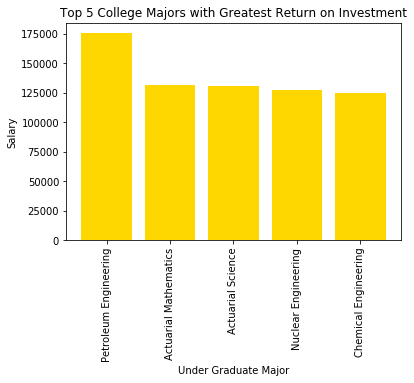

In [35]:
# Create the ticks for our bar chart's x axis
# Give the chart a title, x label, and y label
#Create a new DF 
Top5_df = new_df.sort_values('Mid_Career_Pay_Numeric', ascending = False)[:5]
Top5_df
x_axis = np.arange(0, len(Top5_df.Major))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("Top 5 College Majors with Greatest Return on Investment")
plt.xlabel("Under Graduate Major")
plt.ylabel("Salary")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Top5_df.Major, rotation = 90)
plt.bar(x_axis, Top5_df.Mid_Career_Pay_Numeric, color="gold", align="center")

plt.savefig('GreatestRoi.png', bbox_inches="tight")
plt.show()

In [17]:
# based on the available data the top 5 college majors 
# with the greatest Return on investment are from Petroleum Engineering 
# Actuarial Math, Actuarial Science, Nucler Engineering and Chemical Engineering. 
# One thing we noticed was that the majors 
# apart from Petroluim Engineering, has a relatively even distribution. They all range around the salary of $125,000. 


In [18]:
new_df1 = pd.DataFrame({"Major": earlyMidPayDF["Major"], "Mid Career Pay": earlyMidPayDF["Mid Career Pay"]})
new_df1['Mid_Career_Pay_Numeric'] = new_df1['Mid Career Pay'].replace('[\$,]', '', regex=True).astype(float)
#new_df1
new_df2 = new_df1.sort_values('Mid_Career_Pay_Numeric', ascending = True)[:5]
new_df2



,Major,Mid Career Pay,Mid_Career_Pay_Numeric
488,Early Childhood Education,"$40,400",40400.0
487,Child & Family Studies,"$42,100",42100.0
486,Veterinary Technology,"$43,100",43100.0
485,Early Childhood & Elementary Education,"$43,600",43600.0
484,Child Development,"$44,000",44000.0


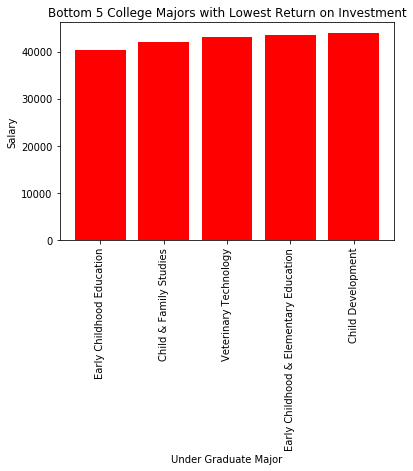

In [34]:
# Create the ticks for our bar chart's x axis
# Give the chart a title, x label, and y label
Bottom5_df = new_df2.sort_values('Mid_Career_Pay_Numeric')
Bottom5_df 
x_axis1 = np.arange(0, len(Bottom5_df.Major))
tick_locations = []
for x in x_axis1:
    tick_locations.append(x)
plt.title("Bottom 5 College Majors with Lowest Return on Investment")
plt.xlabel("Under Graduate Major")
plt.ylabel("Salary")
tick_locations = [value for value in x_axis1]
tick_locations
plt.xticks(tick_locations, Bottom5_df.Major, rotation = 90)
plt.bar(x_axis1, Bottom5_df.Mid_Career_Pay_Numeric, color="red", align="center")

plt.savefig('LeastRoi.png', bbox_inches="tight")
plt.show()

In [20]:
# The college majors with the lowest return on investment are..
# The bottom 5 are very similar in terms of the field in that they 
# are all having to do with earyl childhood education/ development with the exception of veterinary technology.
# There is a significant difference between the pay scales of the top 5 and bottom 5 majors. ($175,000 to $40,000 - $135,000)
# All bottom five seem to be very close in pay, ranging around $40,000.

In [21]:
# get the undergraduate majors with best potential for increase
# track percent change of majors with biggest percent change
# Rank top 10 jumps in salary
top10CareerJumps = associateDegreesDF.sort_values('Percent change from Starting to Mid-Career Salary', ascending = False)
top10CareerJumps[:10]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
37,Math,"$45,400.00","$92,400.00",103.5,"$45,200.00","$64,200.00","$128,000.00","$183,000.00"
42,Philosophy,"$39,900.00","$81,200.00",103.5,"$35,500.00","$52,800.00","$127,000.00","$168,000.00"
33,International Relations,"$40,900.00","$80,900.00",97.8,"$38,200.00","$56,000.00","$111,000.00","$157,000.00"
17,Economics,"$50,100.00","$98,600.00",96.8,"$50,600.00","$70,600.00","$145,000.00","$210,000.00"
36,Marketing,"$40,800.00","$79,600.00",95.1,"$42,100.00","$55,600.00","$119,000.00","$175,000.00"
44,Physics,"$50,300.00","$97,300.00",93.4,"$56,000.00","$74,200.00","$132,000.00","$178,000.00"
45,Political Science,"$40,800.00","$78,200.00",91.7,"$41,200.00","$55,300.00","$114,000.00","$168,000.00"
9,Chemistry,"$42,600.00","$79,900.00",87.6,"$45,300.00","$60,700.00","$108,000.00","$148,000.00"
34,Journalism,"$35,600.00","$66,700.00",87.4,"$38,400.00","$48,300.00","$97,700.00","$145,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


In [22]:
# get the undergraduate majors with least potential for increase
# track percent change of majors with least percent change
# Rank bottom 10 jumps in salary
bottom10CareerJumps = associateDegreesDF.sort_values('Percent change from Starting to Mid-Career Salary', ascending = True)
bottom10CareerJumps[:10]

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
43,Physician Assistant,"$74,300.00","$91,700.00",23.4,"$66,400.00","$75,200.00","$108,000.00","$124,000.00"
40,Nursing,"$54,200.00","$67,000.00",23.6,"$47,600.00","$56,400.00","$80,900.00","$98,300.00"
41,Nutrition,"$39,900.00","$55,300.00",38.6,"$33,900.00","$44,500.00","$70,500.00","$99,200.00"
32,Interior Design,"$36,100.00","$53,200.00",47.4,"$35,700.00","$42,600.00","$72,500.00","$107,000.00"
18,Education,"$34,900.00","$52,000.00",49.0,"$29,300.00","$37,900.00","$73,400.00","$102,000.00"
29,Hospitality & Tourism,"$37,800.00","$57,500.00",52.1,"$35,500.00","$43,600.00","$81,900.00","$124,000.00"
31,Information Technology (IT),"$49,100.00","$74,800.00",52.3,"$44,500.00","$56,700.00","$96,700.00","$129,000.00"
47,Religion,"$34,100.00","$52,000.00",52.5,"$29,700.00","$36,500.00","$70,900.00","$96,400.00"
39,Music,"$35,900.00","$55,000.00",53.2,"$26,700.00","$40,200.00","$88,000.00","$134,000.00"
49,Spanish,"$34,000.00","$53,100.00",56.2,"$31,000.00","$40,000.00","$76,800.00","$96,400.00"


In [23]:
# biggest difference on top and bottom half
# difference between 10th nd 90th percentiles
# add 2 columns to represent number values for percentiles
associateDegreesDF['MidCareer10thNumber'] = associateDegreesDF['Mid-Career 10th Percentile Salary'].replace('[\$,]', '', regex=True).astype(float)
associateDegreesDF['MidCareer90thNumber'] = associateDegreesDF['Mid-Career 90th Percentile Salary'].replace('[\$,]', '', regex=True).astype(float)
associateDegreesDF['10th90thDiff'] = associateDegreesDF['MidCareer90thNumber'] - associateDegreesDF['MidCareer10thNumber']
associateDegreesDF.sort_values('10th90thDiff', ascending = False)[:10]
#associateDegreesDF

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,MidCareer10thNumber,MidCareer90thNumber,10th90thDiff
17,Economics,"$50,100.00","$98,600.00",96.8,"$50,600.00","$70,600.00","$145,000.00","$210,000.00",50600.0,210000.0,159400.0
22,Finance,"$47,900.00","$88,300.00",84.3,"$47,200.00","$62,100.00","$128,000.00","$195,000.00",47200.0,195000.0,147800.0
37,Math,"$45,400.00","$92,400.00",103.5,"$45,200.00","$64,200.00","$128,000.00","$183,000.00",45200.0,183000.0,137800.0
36,Marketing,"$40,800.00","$79,600.00",95.1,"$42,100.00","$55,600.00","$119,000.00","$175,000.00",42100.0,175000.0,132900.0
42,Philosophy,"$39,900.00","$81,200.00",103.5,"$35,500.00","$52,800.00","$127,000.00","$168,000.00",35500.0,168000.0,132500.0
45,Political Science,"$40,800.00","$78,200.00",91.7,"$41,200.00","$55,300.00","$114,000.00","$168,000.00",41200.0,168000.0,126800.0
8,Chemical Engineering,"$63,200.00","$107,000.00",69.3,"$71,900.00","$87,300.00","$143,000.00","$194,000.00",71900.0,194000.0,122100.0
44,Physics,"$50,300.00","$97,300.00",93.4,"$56,000.00","$74,200.00","$132,000.00","$178,000.00",56000.0,178000.0,122000.0
33,International Relations,"$40,900.00","$80,900.00",97.8,"$38,200.00","$56,000.00","$111,000.00","$157,000.00",38200.0,157000.0,118800.0
16,Drama,"$35,900.00","$56,900.00",58.5,"$36,700.00","$41,300.00","$79,100.00","$153,000.00",36700.0,153000.0,116300.0


In [24]:
UGMajor = "Economics", "Finance", "Math", "Marketing", "Philosophy", "Political Science", "Chemical Engineering", "Physics", "International Relations", "Drama"


In [25]:
#careers with least variance between top and bottom
#careers with least variance between top and bottom
associateDegreesDF.sort_values('10th90thDiff')[:10]


,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,MidCareer10thNumber,MidCareer90thNumber,10th90thDiff
40,Nursing,"$54,200.00","$67,000.00",23.6,"$47,600.00","$56,400.00","$80,900.00","$98,300.00",47600.0,98300.0,50700.0
43,Physician Assistant,"$74,300.00","$91,700.00",23.4,"$66,400.00","$75,200.00","$108,000.00","$124,000.00",66400.0,124000.0,57600.0
41,Nutrition,"$39,900.00","$55,300.00",38.6,"$33,900.00","$44,500.00","$70,500.00","$99,200.00",33900.0,99200.0,65300.0
49,Spanish,"$34,000.00","$53,100.00",56.2,"$31,000.00","$40,000.00","$76,800.00","$96,400.00",31000.0,96400.0,65400.0
27,Health Care Administration,"$38,800.00","$60,600.00",56.2,"$34,600.00","$45,600.00","$78,800.00","$101,000.00",34600.0,101000.0,66400.0
47,Religion,"$34,100.00","$52,000.00",52.5,"$29,700.00","$36,500.00","$70,900.00","$96,400.00",29700.0,96400.0,66700.0
23,Forestry,"$39,100.00","$62,600.00",60.1,"$41,000.00","$49,300.00","$78,200.00","$111,000.00",41000.0,111000.0,70000.0
32,Interior Design,"$36,100.00","$53,200.00",47.4,"$35,700.00","$42,600.00","$72,500.00","$107,000.00",35700.0,107000.0,71300.0
18,Education,"$34,900.00","$52,000.00",49.0,"$29,300.00","$37,900.00","$73,400.00","$102,000.00",29300.0,102000.0,72700.0
15,Criminal Justice,"$35,000.00","$56,300.00",60.9,"$32,200.00","$41,600.00","$80,700.00","$107,000.00",32200.0,107000.0,74800.0


In [26]:
#convert median salary to number
associateDegreesDF['Mid-CareerMeanNumber'] = associateDegreesDF['Mid-Career Median Salary'].replace('[\$,]', '', regex=True).astype(float)

In [27]:
#descriptive statistics
#variance
associateDegreesDF['Mid-CareerMeanNumber'].var()

258836738.7755102

In [28]:
#standard deviation
associateDegreesDF['Mid-CareerMeanNumber'].std()

16088.403860405488